# data1.7.csv
## TF-IDF
# 

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('data1.7.csv')
data.head()

,Place,Details,Class,WordCount
0,25th of April Bridge,"['april', '25', 'bridge', 'spanned', 'sides', ...",None Related,183
1,3D Black Art,"['myeongdong', '3d', 'art', 'museum', 'uses', ...",None Related,181
2,3billion,"['company', 'offers', 'genetic', 'testing', 'r...",bioinformatic,20
3,63 Building,"['63', 'city', 'skyscraper', 'seoul', 'yeouido...",None Related,106
4,ABB,"['abb', 'portfolio', 'robotics', 'products', '...",robotic,36


In [2]:
def mat_to_df(mat, vec):
    df = pd.DataFrame(mat.toarray(), columns=vec.get_feature_names_out())
    return df

In [3]:
# Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # Default English stop words 

# Fit and transform the 'Details' column
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Details'])
# Convert the TF-IDF matrix to a DataFrame
tfidf_df = mat_to_df(tfidf_matrix, tfidf_vectorizer)
tfidf_df.head()

,0115,095,10,100,1000,1005,100th,101,1023,104km,...,zidovudine,zigzag,zimbabwe,zodiac,zoic,zone,zones,zoo,zoom,évora
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Concatenate the TF-IDF DataFrame with the original DataFrame
#result_df = pd.concat([data, tfidf_df], axis=1)
result_df = pd.concat([data], axis=1)
# Display the resulting DataFrame
print(result_df.head(3))

                  Place                                            Details  \
0  25th of April Bridge  ['april', '25', 'bridge', 'spanned', 'sides', ...   
1          3D Black Art  ['myeongdong', '3d', 'art', 'museum', 'uses', ...   
2              3billion  ['company', 'offers', 'genetic', 'testing', 'r...   

           Class  WordCount  
0   None Related        183  
1   None Related        181  
2  bioinformatic         20  


# use result_df
## Naive bayes
# 

In [5]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
import imblearn
from imblearn.combine import SMOTETomek

# From previous DataFrame
selected = result_df.copy()

# Split the data into training and testing sets
train_data, test_data = train_test_split(selected, test_size=0.2, random_state=42)

# Save the test data to a CSV file
train_data.to_csv('train_data(80%).csv', index=False)
test_data.to_csv('test_data(20%).csv', index=False)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # max_features may be remove just testing (, max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Details'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['Details'])

X_train_df = mat_to_df(X_train_tfidf, tfidf_vectorizer)
X_test_df = mat_to_df(X_test_tfidf, tfidf_vectorizer)

# Handling imbalance class / data
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train_tfidf, train_data["Class"])
#X_res, y_res = X_train_tfidf, train_data["Class"]
print(y_res.value_counts())

# Create and train a Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_res, y_res)


# Model Evaluation
# Make Predictions on the test set
predictions = naive_bayes_classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy = accuracy_score(test_data['Class'], predictions)
conf_matrix = confusion_matrix(test_data['Class'], predictions)
classification_rep = classification_report(test_data['Class'], predictions)

# Display evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    classification_rep = classification_report(y_test, predictions)
    
    print(f'Accuracy: {accuracy:.2f}')
    print('\nConfusion Matrix:')
    print(conf_matrix)
    print('\nClassification Report:')
    print(classification_rep)


# Save the train model to a file
joblib.dump(naive_bayes_classifier, 'model.h5')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

Class
None Related     396
robotic          396
biotechnology    396
aerospace        396
bioinformatic    396
Name: count, dtype: int64
Accuracy: 1.00

Confusion Matrix:
[[101   0   0   0   0]
 [  0  10   0   0   0]
 [  0   0   8   0   0]
 [  0   0   0  11   0]
 [  0   0   0   0  20]]

Classification Report:
               precision    recall  f1-score   support

 None Related       1.00      1.00      1.00       101
    aerospace       1.00      1.00      1.00        10
bioinformatic       1.00      1.00      1.00         8
biotechnology       1.00      1.00      1.00        11
      robotic       1.00      1.00      1.00        20

     accuracy                           1.00       150
    macro avg       1.00      1.00      1.00       150
 weighted avg       1.00      1.00      1.00       150



['tfidf_vectorizer.pkl']

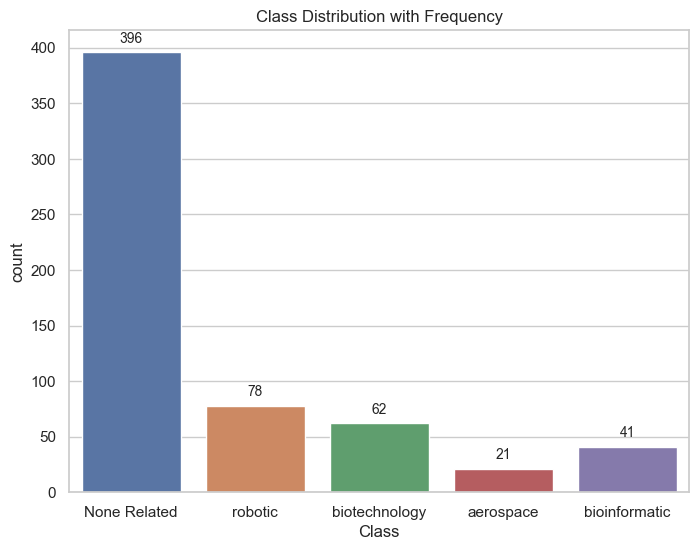

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_data is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create the count plot
ax = sns.countplot(x='Class', data=train_data, hue='Class')

# Add frequency labels on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title('Class Distribution with Frequency')
plt.show()


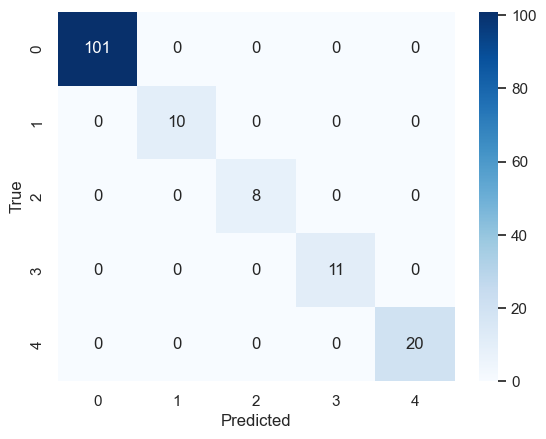

In [7]:
import seaborn as sns
cm = confusion_matrix(test_data['Class'], predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [8]:
# Load the saved TF-IDF vectorizer
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')
# Load the saved Naive Bayes classifier
naive_bayes_classifier = joblib.load('model.h5')


def class_det(Details, vectorizer, classifier):
    input_data = [Details]
    vectorized_input_data = vectorizer.transform(input_data)
    predictions = classifier.predict(vectorized_input_data)
    print(predictions)
    return predictions
    


In [9]:
queries = [
    'Astra makes engines for spacecraft using electric propulsion technology and provides launch services for space missions. Astra reached a key milestone in 2021, succeeding in its first commercial launch to low Earth orbit. The company says its launch systems are designed to be cost efficient with a payload capacity of approximately 600 kg',
    "Sinopharm is known for developing two inactivated virus COVID-19 vaccines. One of them is the Sinopharm BIBP COVID-19 vaccine, also known as BBIBP-CorV2. This vaccine completed Phase III trials in several countries with over 60,000 participants. It’s one of the vaccines being used in vaccination campaigns by certain countries in Asia, Africa, South America, and Europe",
    "Magic Leap, Inc. is an American technology company that released a head-mounted augmented reality display, called Magic Leap One, which superimposes 3D computer-generated imagery over real world objects. It is attempting to construct a light-field chip using silicon photonics.",
    "The rockets are very versatile. They can reach up to 10000 lbs of thrust and reach velocities to escape Earth's orbit. They will be essential in reaching the moon.",
]


for query in queries:
    print(query, class_det(query, loaded_vectorizer, naive_bayes_classifier))
    print()

['aerospace']
Astra makes engines for spacecraft using electric propulsion technology and provides launch services for space missions. Astra reached a key milestone in 2021, succeeding in its first commercial launch to low Earth orbit. The company says its launch systems are designed to be cost efficient with a payload capacity of approximately 600 kg ['aerospace']

['biotechnology']
Sinopharm is known for developing two inactivated virus COVID-19 vaccines. One of them is the Sinopharm BIBP COVID-19 vaccine, also known as BBIBP-CorV2. This vaccine completed Phase III trials in several countries with over 60,000 participants. It’s one of the vaccines being used in vaccination campaigns by certain countries in Asia, Africa, South America, and Europe ['biotechnology']

['robotic']
Magic Leap, Inc. is an American technology company that released a head-mounted augmented reality display, called Magic Leap One, which superimposes 3D computer-generated imagery over real world objects. It is a